In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [13]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib

import numpy

In [17]:
dataset = tf.data.Dataset.from_tensor_slices([8,3,0,8,2,1])
print(dataset)

<TensorSliceDataset shapes: (), types: tf.int32>


In [20]:
for elem in dataset:
  print(elem.numpy())

8
3
0
8
2
1


In [34]:
it=iter(dataset)
print(next(it).numpy())

8


In [35]:
titanic_file = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic_lines = tf.data.TextLineDataset(titanic_file)

32768/30874 [===============================] - 0s 3us/step


In [37]:
def plot_batch_sizes(ds):
  batch_sizes = [batch.shape[0] for batch in ds]
  plt.bar(range(len(batch_sizes)), batch_sizes)
  plt.xlabel('Batch number')
  plt.ylabel('Batch Size')

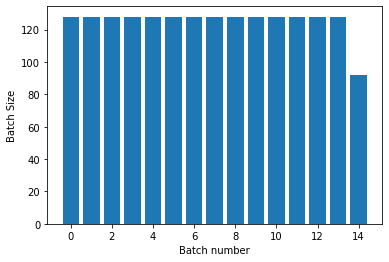

In [44]:
titanic_batches = titanic_lines.repeat(3).batch(128)
plot_batch_sizes(titanic_batches)

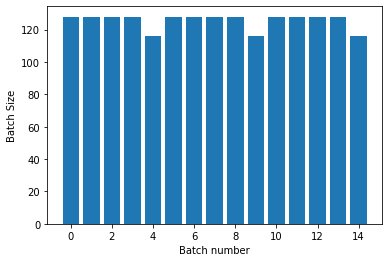

In [45]:
titanic_batches = titanic_lines.batch(128).repeat(3)
plot_batch_sizes(titanic_batches)

In [47]:
epochs = 3
dataset = titanic_lines.batch(128)

for epoch in range(epochs):
  for batch in dataset:
    print(batch.shape)
  print("End of epoch: ",epoch)

(128,)
(128,)
(128,)
(128,)
(116,)
End of epoch:  0
(128,)
(128,)
(128,)
(128,)
(116,)
End of epoch:  1
(128,)
(128,)
(128,)
(128,)
(116,)
End of epoch:  2
